# Introduction to Artificial Neural Networks with tf.keras

## Prerequisites

1.	Install Python.
2.	Install TensorFlow.
3.	Install a Python IDE. 
    - We will be using Jupyter Notebook in this course.
4.	Install HDF5 and h5py to have the ability to save tf.keras models to disk.
5.	tf.keras is both CPU and GPU compatible. 
    - A GPU is not required for the course.
    - If using a GPU, you will need to set up the GPU according to the steps provided in an <a href="https://deeplizard.com/learn/video/IubEtS2JAiY">earlier episode</a>.
7.  If you are brand new to deep learning, then it is recommended that you start with our <a href="https://deeplizard.com/learn/playlist/PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU">Deep Learning Fundamentals course</a> first.

# Convolutional Neural Networks

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


## Data preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition:
https://www.kaggle.com/c/dogs-vs-cats/data

In [6]:
train_path = 'data/cats-and-dogs/train'
valid_path = 'data/cats-and-dogs/valid'
test_path = 'data/cats-and-dogs/test'

In [7]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
# assert train_batches.n == 40
# assert valid_batches.n == 16
# assert test_batches.n == 10
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [10]:
# plots images with labels within jupyter notebook
# source: https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py#L79

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [11]:
imgs, labels = next(train_batches)

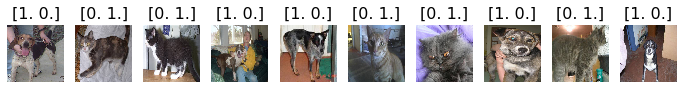

In [12]:
plots(imgs, titles=labels)

## Build and train a CNN

In [13]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(units=2, activation='softmax'),
    ])

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(x=train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Train for 4 steps, validate for 4 steps
Epoch 1/5
4/4 - 17s - loss: 0.3763 - accuracy: 0.8750 - val_loss: 0.1679 - val_accuracy: 0.9375
Epoch 2/5
4/4 - 19s - loss: 0.5488 - accuracy: 0.8750 - val_loss: 0.1625 - val_accuracy: 0.9375
Epoch 3/5
4/4 - 19s - loss: 0.3599 - accuracy: 0.8750 - val_loss: 0.1529 - val_accuracy: 0.9375
Epoch 4/5
4/4 - 17s - loss: 0.1809 - accuracy: 0.9000 - val_loss: 0.1344 - val_accuracy: 0.9375
Epoch 5/5
4/4 - 17s - loss: 0.3269 - accuracy: 0.9250 - val_loss: 0.1231 - val_accuracy: 0.9375


## Predict

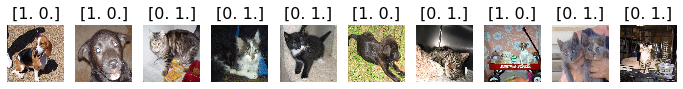

In [71]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [72]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 0., 0., 1., 0., 1., 0., 0.], dtype=float32)

In [73]:
predictions = model.predict(x=test_batches, steps=1, verbose=0)

In [74]:
predictions

array([[3.5366966e-04, 9.9964631e-01],
       [8.7185830e-01, 1.2814170e-01],
       [9.9776316e-01, 2.2368671e-03],
       [1.9224601e-04, 9.9980778e-01],
       [3.8926354e-01, 6.1073649e-01],
       [7.0798903e-04, 9.9929202e-01],
       [6.0188060e-04, 9.9939811e-01],
       [1.4968358e-03, 9.9850321e-01],
       [9.1992610e-04, 9.9908006e-01],
       [1.7279995e-03, 9.9827194e-01]], dtype=float32)

In [75]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 1]
 [3 1]]


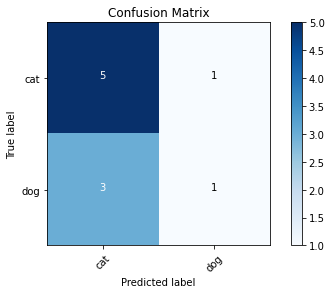

In [77]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Build Fine-tuned VGG16 model

In [78]:
# Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [25]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [27]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [28]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [31]:
for layer in model.layers:
    layer.trainable = False

In [32]:
model.add(Dense(units=2, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [34]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194

## Train the fine-tuned VGG16 model

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
history = model.fit(x=train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=10, verbose=2)

Train for 4 steps, validate for 4 steps
Epoch 1/10
4/4 - 17s - loss: 0.3685 - accuracy: 0.8500 - val_loss: 0.1153 - val_accuracy: 0.9375
Epoch 2/10
4/4 - 18s - loss: 0.2102 - accuracy: 0.9250 - val_loss: 0.1099 - val_accuracy: 0.9375
Epoch 3/10
4/4 - 19s - loss: 0.3064 - accuracy: 0.8750 - val_loss: 0.1056 - val_accuracy: 0.9375
Epoch 4/10
4/4 - 18s - loss: 0.1215 - accuracy: 0.9500 - val_loss: 0.1108 - val_accuracy: 0.9375
Epoch 5/10
4/4 - 17s - loss: 0.2428 - accuracy: 0.9000 - val_loss: 0.1215 - val_accuracy: 0.9375
Epoch 6/10
4/4 - 17s - loss: 0.0833 - accuracy: 0.9750 - val_loss: 0.1353 - val_accuracy: 0.9375
Epoch 7/10
4/4 - 17s - loss: 0.2753 - accuracy: 0.9000 - val_loss: 0.1528 - val_accuracy: 0.9375
Epoch 8/10
4/4 - 17s - loss: 0.1222 - accuracy: 0.9500 - val_loss: 0.1631 - val_accuracy: 0.9375
Epoch 9/10
4/4 - 17s - loss: 0.1424 - accuracy: 0.9500 - val_loss: 0.1645 - val_accuracy: 0.9375
Epoch 10/10
4/4 - 17s - loss: 0.0574 - accuracy: 1.0000 - val_loss: 0.1619 - val_accura

In [85]:
assert model.history.history.get('accuracy')[-1] > 0.85

## Predict using fine-tuned VGG16 model

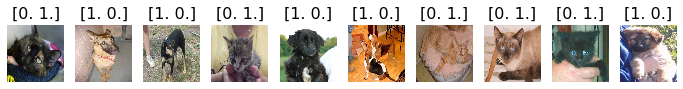

In [86]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [87]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 1., 0., 1., 1., 0., 0., 0., 1.], dtype=float32)

In [88]:
predictions = model.predict(x=test_batches, steps=1, verbose=0)

In [89]:
predictions

array([[4.3885731e-05, 9.9995613e-01],
       [7.7751267e-01, 2.2248733e-01],
       [9.9911922e-01, 8.8080548e-04],
       [2.8693074e-05, 9.9997127e-01],
       [2.5077614e-01, 7.4922389e-01],
       [5.2930867e-05, 9.9994707e-01],
       [1.2527562e-04, 9.9987471e-01],
       [4.9208623e-04, 9.9950790e-01],
       [3.0451774e-04, 9.9969554e-01],
       [5.7534408e-04, 9.9942470e-01]], dtype=float32)

In [90]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))

Confusion matrix, without normalization
[[5 0]
 [3 2]]


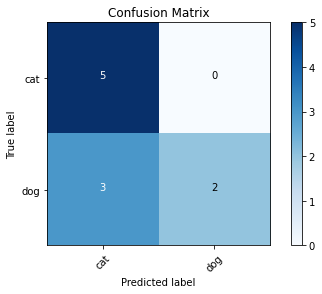

In [91]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [92]:
def print_results(cm):
    tp = cm[0, 0]
    tn = cm[1, 1]
    fn = cm[0, 1]
    fp = cm[1, 0]
    
    accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
    
    sensitivity = (tp / (tp + fn)) * 100
    
    specificity = (tn / ( tn + fp )) * 100
    
    print ('Accuracy: ',  accuracy)

    print ('Sensitivity: ', sensitivity)
    
    print ('Specificity: ',  specificity)

In [93]:
print_results(cm)

Accuracy:  70.0
Sensitivity:  100.0
Specificity:  40.0


In [94]:
def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.show()

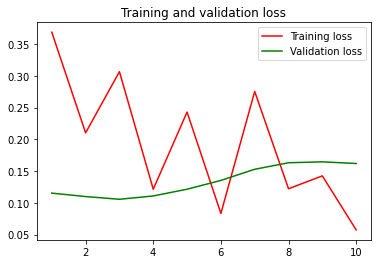

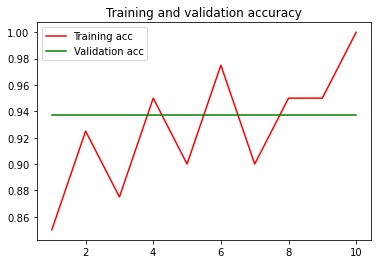

<Figure size 432x288 with 0 Axes>

In [95]:
plot_training_curves(history)